In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

#my imports
import env
import os
import wrangle as w
import acquire

In [2]:
#Get my data
df = w.acquire_zillow()

### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   propertylandusetypeid         52441 non-null  float64
 2   typeconstructiontypeid        76 non-null     float64
 3   storytypeid                   47 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   architecturalstyletypeid      70 non-null     float64
 6   buildingclasstypeid           0 non-null      float64
 7   heatingorsystemtypeid         33935 non-null  float64
 8   id                            52441 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52441 non-null  float64
 11  bedroomcnt                    52441 non-null  float64
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

In [4]:
## Taking this out of my prepare so I dont lose too much data
#df = df.drop(index=df[df.regionidzip == df.regionidzip.max()].index.tolist())

In [5]:
df = w.prepare_zillow(df)

In [6]:
#df = w.handle_missing_values(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50709 entries, 0 to 52440
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50709 non-null  int64  
 1   propertylandusetypeid         50709 non-null  float64
 2   basementsqft                  50709 non-null  float64
 3   bathroomcnt                   50709 non-null  float64
 4   bedroomcnt                    50709 non-null  float64
 5   calculatedbathnbr             50709 non-null  float64
 6   decktypeid                    50709 non-null  float64
 7   calculatedfinishedsquarefeet  50709 non-null  float64
 8   finishedsquarefeet12          50709 non-null  float64
 9   fips                          50709 non-null  float64
 10  fireplacecnt                  50709 non-null  float64
 11  fullbathcnt                   50709 non-null  float64
 12  hashottuborspa                50709 non-null  float64
 13  l

In [8]:
#Split the data
train, validate, test = w.train_validate_test_split(df)

In [9]:
train.head()

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,typeconstructiondesc,propertylandusedesc,county
23412,11362096,261.00,0.00,2.00,3.00,2.00,0.00,"1,395.00","1,395.00","6,037.00",...,"106,739.00","2,543.78",N,"99,999.00","60,379,201,061,067.00",-0.00,2017-05-10,None,Single Family Residential,Los Angeles
42052,12956704,261.00,0.00,2.00,2.00,2.00,0.00,"1,613.00","1,613.00","6,037.00",...,"191,541.00","4,313.70",N,"99,999.00","60,374,303,013,000.00",0.02,2017-07-28,None,Single Family Residential,Los Angeles
33235,11346275,261.00,0.00,3.00,5.00,3.00,0.00,"3,216.00","3,216.00","6,037.00",...,"218,079.00","7,728.70",N,"99,999.00","60,379,200,152,010.00",0.02,2017-06-22,None,Single Family Residential,Los Angeles
14291,14051806,261.00,0.00,3.00,5.00,3.00,0.00,"1,883.00","1,883.00","6,059.00",...,"267,404.00","4,577.40",N,"99,999.00","60,590,992,441,012.00",-0.09,2017-03-29,None,Single Family Residential,Orange
12549,11927636,261.00,0.00,2.00,3.00,2.00,0.00,"1,272.00","1,272.00","6,037.00",...,"394,560.00","6,523.91",N,"99,999.00","60,374,319,003,001.00",0.01,2017-03-21,None,Single Family Residential,Los Angeles


(array([1.0000e+00, 0.0000e+00, 1.9000e+01, 9.0000e+00, 1.1600e+02,
        3.4189e+04, 1.0430e+03, 6.0000e+01, 5.1000e+01, 6.0000e+00]),
 array([-4.453964  , -3.66911319, -2.88426239, -2.09941158, -1.31456077,
        -0.52970997,  0.25514084,  1.03999165,  1.82484245,  2.60969326,
         3.39454407]),
 <BarContainer object of 10 artists>)

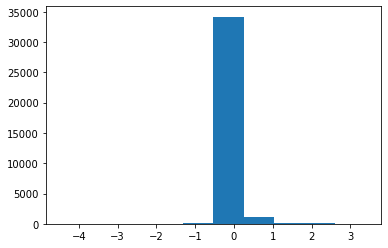

In [10]:
plt.hist(train['logerror'])

### Question 1: Does location have a relationship with log error?

In [11]:
train.county.value_counts()

Los Angeles    23017
Orange          9462
Ventura         3015
Name: county, dtype: int64

In [12]:
LA = train[train.county == 'Los Angeles']
Orange = train[train.county == 'Orange']
Ventura = train[train.county == 'Ventura']

In [17]:
print(f'LA Log Error mean:{LA.logerror.mean()}')
print(f'Orange Log Error mean:{Orange.logerror.mean()}')
print(f'Ventura Log Error mean:{Ventura.logerror.mean()}')

LA Log Error mean:0.01579096118410842
Orange Log Error mean:0.025162274725869117
Ventura Log Error mean:0.016092555362402595


In [19]:
#Checking variance before running test
from scipy.stats import levene
stat, p = levene(LA.logerror, Orange.logerror, Ventura.logerror)
stat, p

(24.740788821910424, 1.8310288100934043e-11)

In [23]:
#Variances are different, now running a t-test anova
f, p = stats.f_oneway(LA.logerror, Orange.logerror, Ventura.logerror)
f, p

(10.040261801434172, 4.373234705515068e-05)

### The difference in log error with counties is significant, with Orange county having the highest amount of log error and LA county having the lowest

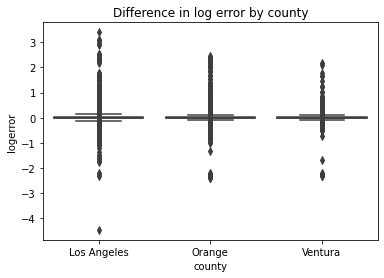

In [27]:
sns.boxplot(x=train.county, y=train.logerror)
plt.title("Difference in log error by county")
plt.show()

<AxesSubplot:>

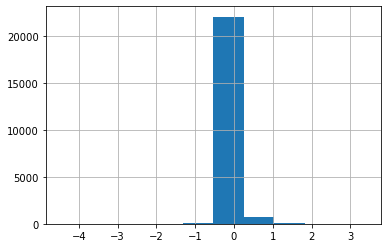

In [28]:
sns.boxplot()